# **Personality Prediction**

## Data Importation

Import libraries:

In [72]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import and read the dataset:

In [73]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
df = pd.read_csv('/content/gdrive/My Drive/Personality prediction/Bronze/mbti_1.csv')
print(df)

      type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]


## Exploratory Data Analysis

### Validation and Data Preparation

Visualize the dataset:

In [75]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


Verify if there are any NaN values:


In [76]:
df.isnull().any()

type     False
posts    False
dtype: bool

Take a look at the data types:

In [77]:
df.dtypes

type     object
posts    object
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


Analyse the dataset:

In [79]:
df.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'I could really use some IRL cheat codes right...
freq,1832,1


In [80]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

Split the posts and double the personality type as many times as it is necessary:

In [81]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))

Number of users 8675
Number of posts 422845


In [82]:
df = pd.DataFrame(posts, columns=["types", "posts"])
print(df.shape)
print(df.head())

(422845, 2)
  types                                              posts
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2  INFJ  enfp and intj moments  https://www.youtube.com...
3  INFJ  What has been the most life-changing experienc...
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...


### Multivariate Analysis

Analyse the number of personality types and count their number of total posts:

In [83]:
total = df.groupby(['types']).count()
total

,posts
types,
ENFJ,9288
ENFP,32769
ENTJ,11273
ENTP,33761
ESFJ,2018
ESFP,2215
ESTJ,1921
ESTP,4337
INFJ,72105


The graphics of total posts for each personality type:

Text(0.5, 1.0, 'Total posts for each personality type')

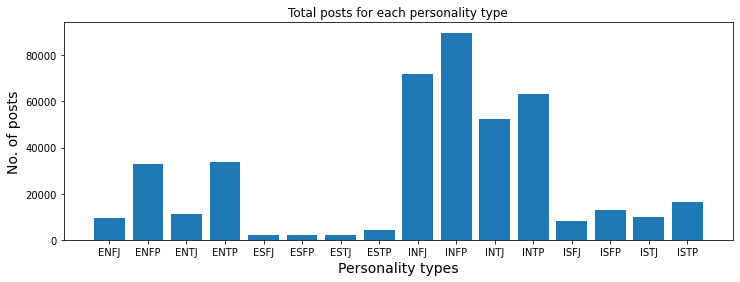

In [84]:
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts for each personality type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


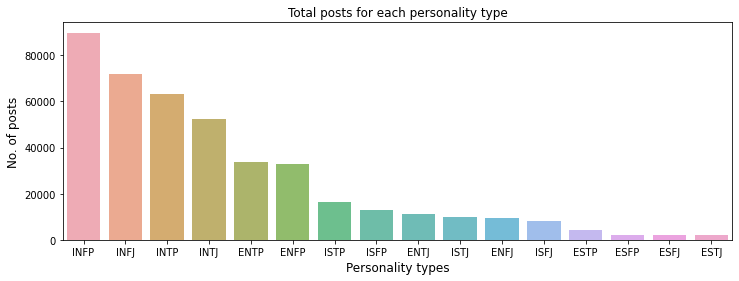

In [85]:
cnt_srs = df['types'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts', fontsize=12)
plt.title('Total posts for each personality type')
plt.show()

### Univariate Analysis

Split every type of personality into pairs of letters, based on their index :

In [86]:
df['Letter1'] = df.apply(lambda row: row.types[0], axis = 1)
df['Letter2'] = df.apply(lambda row: row.types[1], axis = 1)
df['Letter3'] = df.apply(lambda row: row.types[2], axis = 1)
df['Letter4'] = df.apply(lambda row: row.types[3], axis = 1)
df = df.drop(df.columns[0], axis=1)
print(df)

                                                    posts  ... Letter4
0             'http://www.youtube.com/watch?v=qsXHcwe3krw  ...       J
1       http://41.media.tumblr.com/tumblr_lfouy03PMA1q...  ...       J
2       enfp and intj moments  https://www.youtube.com...  ...       J
3       What has been the most life-changing experienc...  ...       J
4       http://www.youtube.com/watch?v=vXZeYwwRDw8   h...  ...       J
...                                                   ...  ...     ...
422840  I was going to close my facebook a few months ...  ...       P
422841  30 Seconds to Mars - All of my collections. It...  ...       P
422842  I have seen it, and i agree. I did actually th...  ...       P
422843  Ok so i have just watched Underworld 4 (Awaken...  ...       P
422844  I would never want to turn off my emotions. so...  ...       P

[422845 rows x 5 columns]


We have obtained a dataframe made of 422845 rows and 5 columns.

Drop duplicates:

In [87]:
df = df.drop_duplicates()

In [88]:
df.shape

(419055, 5)

Eliminate NaN values:

In [89]:
df = df.dropna()

In [90]:
df.shape

(419055, 5)

Our final dataset consists of 419055 rows and 5 columns.

Analyse number of posts per each pair of letters:

In [91]:
letter1 = df[['posts','Letter1']].groupby(['Letter1']).count()
letter1

,posts
Letter1,
E,96550
I,322505


Text(0.5, 1.0, 'Total posts per each letter')

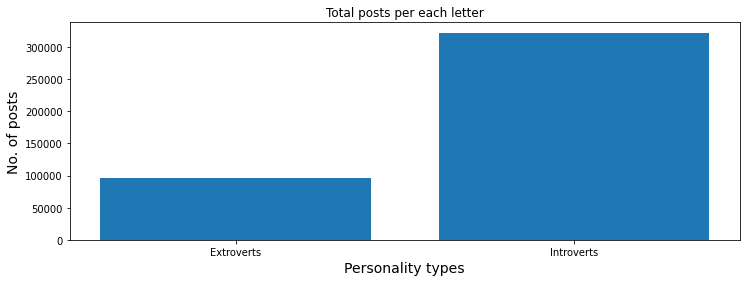

In [92]:
plt.figure(figsize = (12,4))
plt.bar(('Extroverts', 'Introverts'), height = letter1['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

In [93]:
letter2 = df[['posts','Letter2']].groupby(['Letter2']).count()
letter2

,posts
Letter2,
N,361537
S,57518


Text(0.5, 1.0, 'Total posts per each letter')

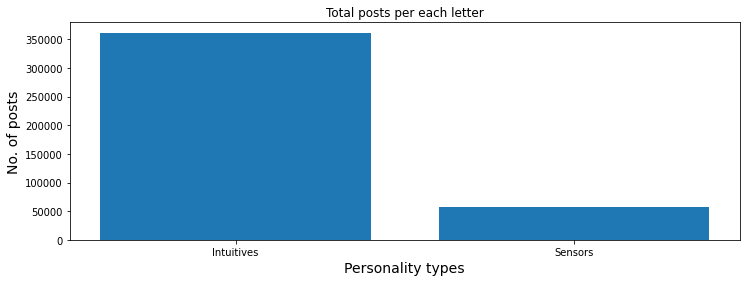

In [94]:
plt.figure(figsize = (12,4))
plt.bar(('Intuitives', 'Sensors'), height = letter2['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

In [95]:
letter3 = df[['posts','Letter3']].groupby(['Letter3']).count()
letter3

,posts
Letter3,
F,227253
T,191802


Text(0.5, 1.0, 'Total posts per each letter')

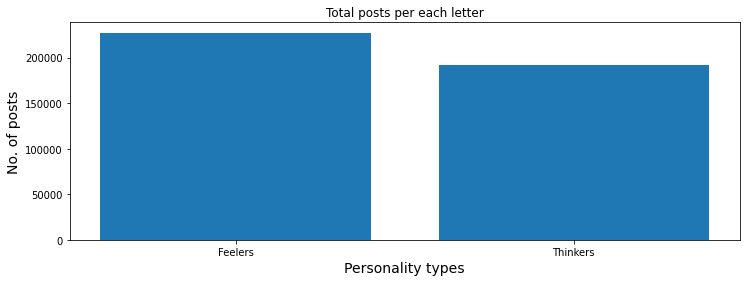

In [96]:
plt.figure(figsize = (12,4))
plt.bar(('Feelers', 'Thinkers'), height = letter3['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

In [97]:
letter4 = df[['posts','Letter4']].groupby(['Letter4']).count()
letter4

,posts
Letter4,
J,165684
P,253371


Text(0.5, 1.0, 'Total posts per each letter')

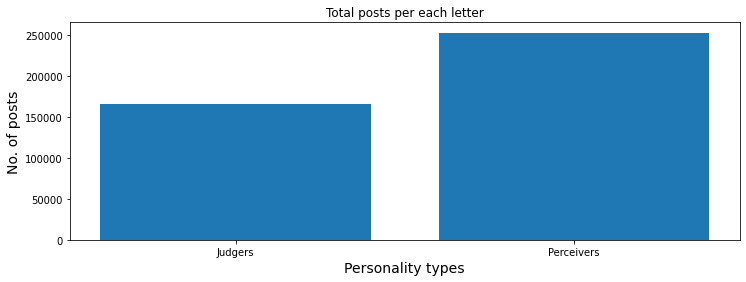

In [98]:
plt.figure(figsize = (12,4))
plt.bar(('Judgers', 'Perceivers'), height = letter4['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts', size = 14)
plt.title('Total posts per each letter')

## Posts Preprocessing

Delete all the links, tokenize the posts, turn them into lowercase, eliminate punctuation and stopwords, apply stemming.

In [99]:
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
regex = '(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
df['posts'] = df['posts'].replace(to_replace = regex, value = np.NaN, regex=True)
df = df.dropna()
posts = df['posts'].values
for i in range(len(posts)):
  posts[i] = ' '.join([porter.stem(word.lower()) for word in tokenizer.tokenize(posts[i]) if word.lower() not in stop])
df['posts'] = posts

Visualize the dataframe:


In [101]:
df.head()

,posts,Letter1,Letter2,Letter3,Letter4
3,life chang experi life,I,N,F,J
5,may perc experi immers,I,N,F,J
7,hello enfj7 sorri hear distress natur relation...,I,N,F,J
9,welcom stuff,I,N,F,J
11,prozac wellbrutin least thirti minut move leg ...,I,N,F,J


In [102]:
df.tail()

,posts,Letter1,Letter2,Letter3,Letter4
422840,go close facebook month back well want abl mes...,I,N,F,P
422841,30 second mar collect seem fit mood right,I,N,F,P
422842,seen agre actual think first time watch movi b...,I,N,F,P
422843,ok watch underworld 4 awaken must say realli g...,I,N,F,P
422844,would never want turn emot sometim hide world ...,I,N,F,P


### Analysis of the most frecvent words

Analyze the Frequency Distribution:

In [103]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
def counter(text, column_text, quantity, title):
    frequency = nltk.FreqDist(' '.join(list(text[column_text].apply(lambda x: ' '.join(x.split())))).split())  
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.show()

The graphics of frequency:

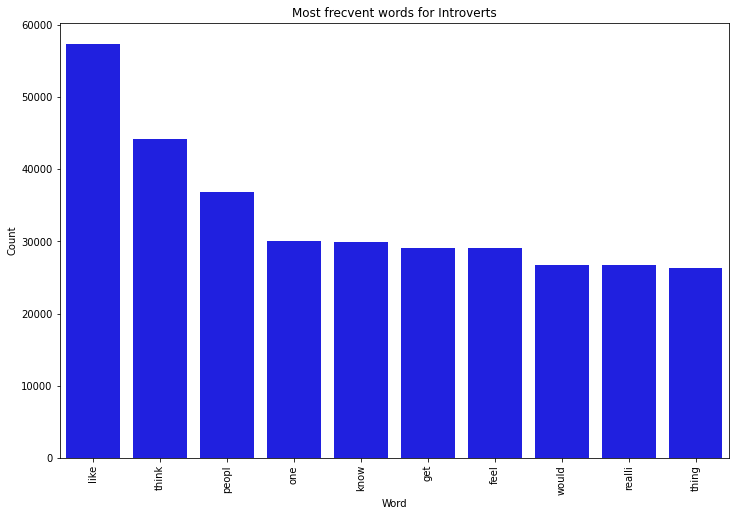

In [104]:
counter(df[df['Letter1'].str.contains("I")], 'posts', 10, 'Most frecvent words for Introverts')

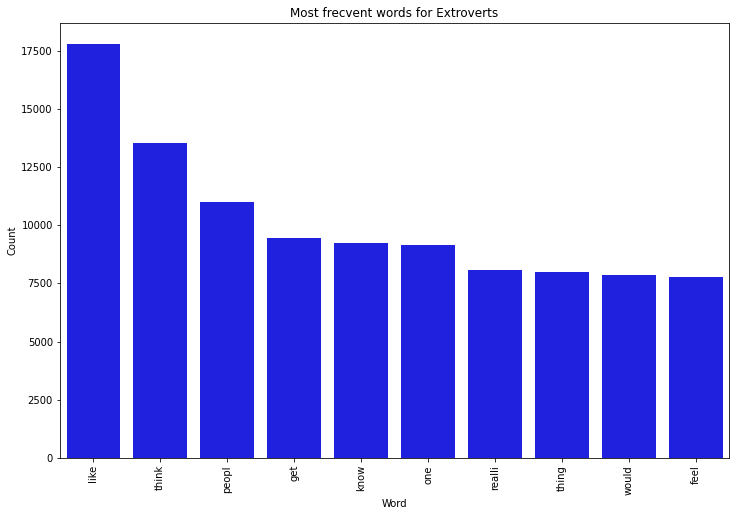

In [105]:
counter(df[df['Letter1'].str.contains("E")], 'posts', 10, 'Most frecvent words for Extroverts')

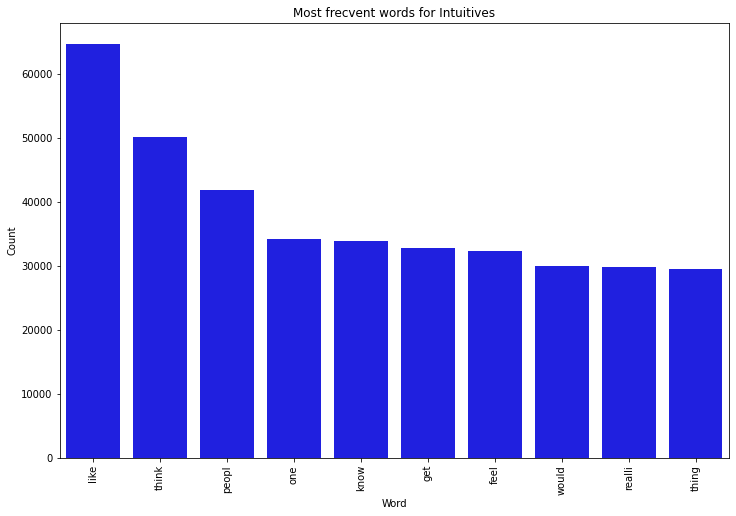

In [106]:
counter(df[df['Letter2'].str.contains("N")], 'posts', 10, 'Most frecvent words for Intuitives')

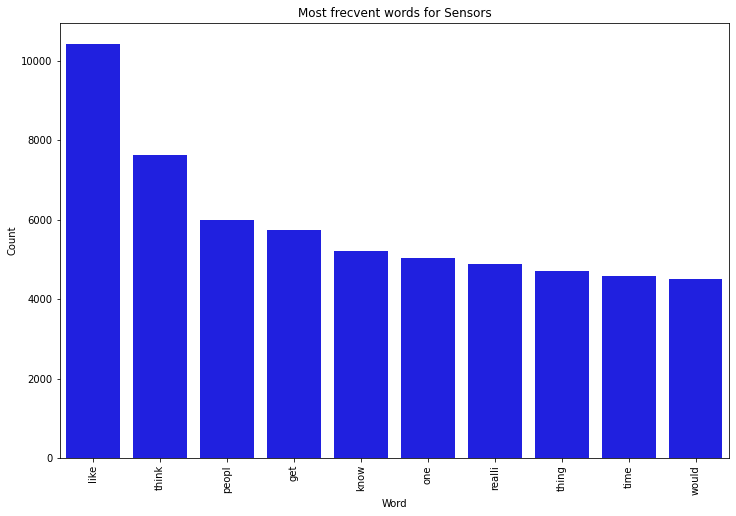

In [107]:
counter(df[df['Letter2'].str.contains("S")], 'posts', 10, 'Most frecvent words for Sensors')

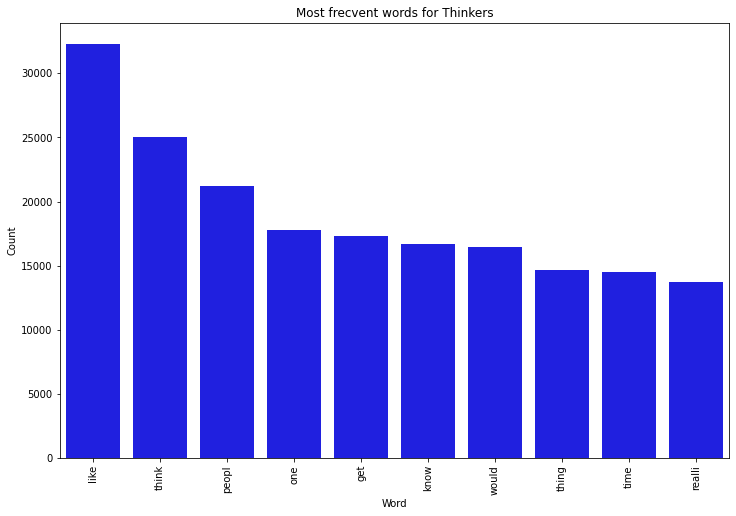

In [108]:
counter(df[df['Letter3'].str.contains("T")], 'posts', 10, 'Most frecvent words for Thinkers')

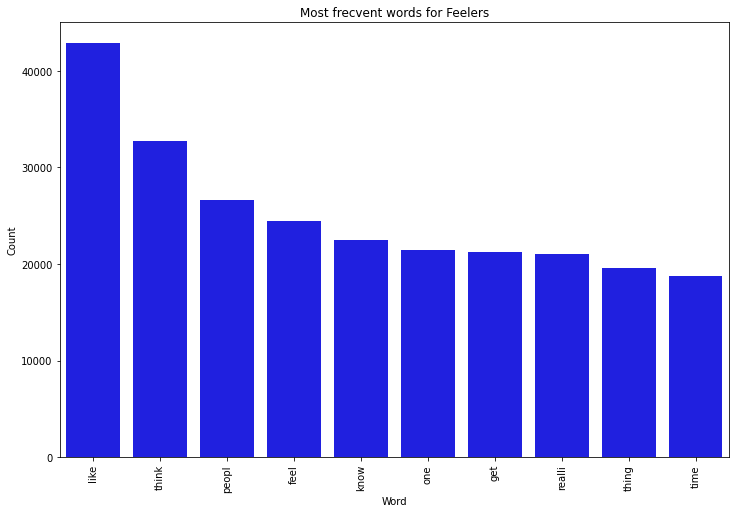

In [109]:
counter(df[df['Letter3'].str.contains("F")], 'posts', 10, 'Most frecvent words for Feelers')

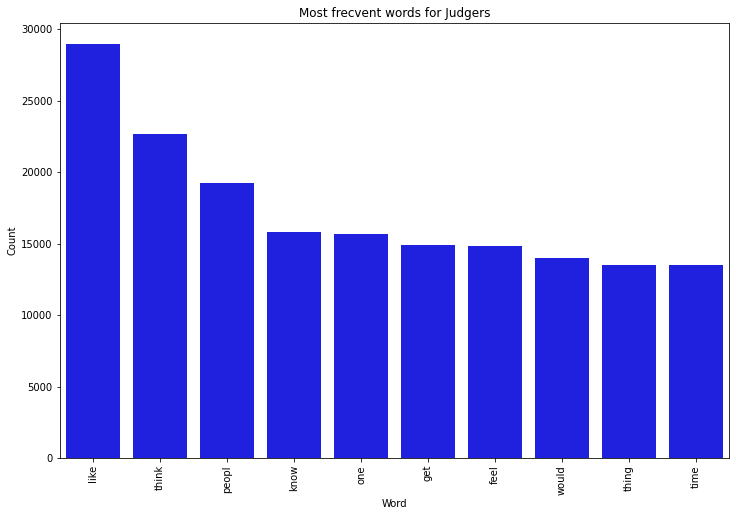

In [110]:
counter(df[df['Letter4'].str.contains("J")], 'posts', 10, 'Most frecvent words for Judgers')

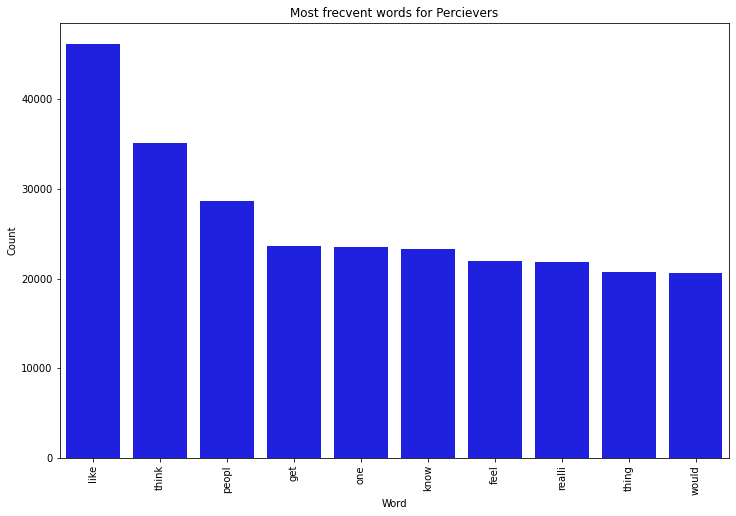

In [111]:
counter(df[df['Letter4'].str.contains("P")], 'posts', 10, 'Most frecvent words for Percievers')

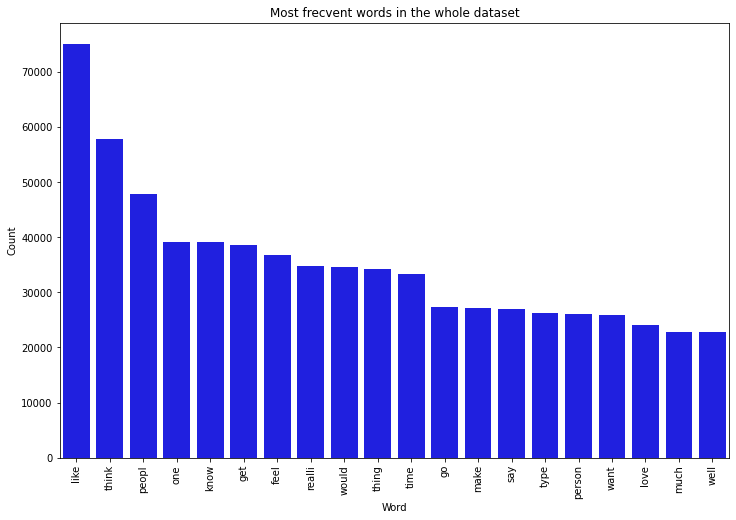

In [112]:
counter(df, 'posts', 20, 'Most frecvent words in the whole dataset')

## Modeling

Import the necessary libraries:

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

### Model for the 1st pair

Our dataset is unbalanced, so we're going to undersample the majority class.

In [ ]:
class_count_I, class_count_E = df['Letter1'].value_counts()
class_I = df[df['Letter1'] == 'I']
class_E = df[df['Letter1'] == 'E']
print('I:', class_I.shape)
print('E:', class_E.shape)

I: (301904, 5)
E: (92075, 5)


total class of E and I: I    92075
E    92075
Name: Letter1, dtype: int64


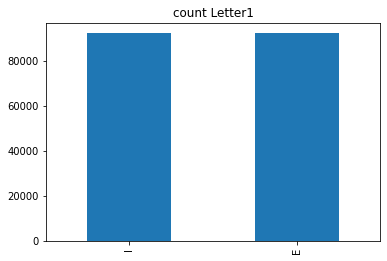

In [ ]:
class_I_under = class_I.sample(class_count_E)
test_under1 = pd.concat([class_I_under, class_E], axis=0)
print("total class of E and I:", test_under1['Letter1'].value_counts())
test_under1['Letter1'].value_counts().plot(kind='bar', title='count Letter1')

Create the necessary dataframe and shuffle it:

In [ ]:
df1 = test_under1[['posts', 'Letter1']]
df1 = df1.sample(frac = 1)
df1

,posts,Letter1
20827,sympathi op express multipl time mean instig h...,I
68568,stop treat like free agent figur pattern think...,I
155165,rather entp analyz lot pro f j want complet ch...,I
282840,first person type enfj relationship istj end s...,E
203833,would actual creepi way make sound like someth...,I
...,...,...
323014,ad illustr also occasion storyboard artist eve...,I
155755,watch movi familiar concept believ would prove...,E
400475,let go 7w6 focu wondrou interest part life alm...,I
389972,shower hassl interrupt day great go find hot s...,I


Split the dataset into the train and test:

In [ ]:
X1 = df1['posts']
y1 = df1['Letter1']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

Create the model:

In [ ]:
pipe1 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 2))])
model1 = pipe1.fit(X_train1, y_train1)
prediction1 = model1.predict(X_test1)

Evaluate the model:

accuracy: 56.66%
              precision    recall  f1-score   support

           E       0.57      0.55      0.56     30345
           I       0.57      0.58      0.57     30425

    accuracy                           0.57     60770
   macro avg       0.57      0.57      0.57     60770
weighted avg       0.57      0.57      0.57     60770



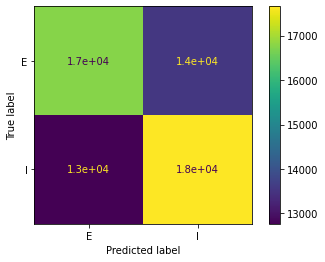

In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test1, prediction1)*100,2)))
print(metrics.classification_report(y_test1, prediction1))
plot_confusion_matrix(model1, X_test1, y_test1)  
plt.show()

Conclusion:

We have obtained a model that has a 56,66% accuracy score.

Save the model:

In [ ]:
dump(model1, '/content/gdrive/MyDrive/Personality prediction/Balanced Models/model1.joblib')

['/content/gdrive/MyDrive/Personality prediction/Balanced Models/model1.joblib']

### Model for the 2nd pair


Our dataset is unbalanced, so we're going to undersample the majority class.

In [ ]:
class_count_N, class_count_S = df['Letter2'].value_counts()
class_N = df[df['Letter2'] == 'N']
class_S = df[df['Letter2'] == 'S']
print('N:', class_N.shape)
print('S:', class_S.shape)

N: (340239, 5)
S: (53740, 5)


total class of S and N: N    53740
S    53740
Name: Letter2, dtype: int64


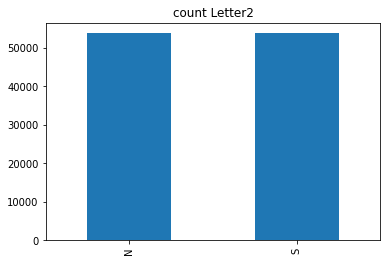

In [ ]:
class_N_under = class_N.sample(class_count_S)
test_under2 = pd.concat([class_N_under, class_S], axis=0)
print("total class of S and N:", test_under2['Letter2'].value_counts())
test_under2['Letter2'].value_counts().plot(kind='bar', title='count Letter2')

Create the necessary dataframe and shuffle it:

In [ ]:
df2 = test_under2[['posts', 'Letter2']]
df2 = df2.sample(frac = 1)
df2

,posts,Letter2
293287,nag suspicion along done mbti test month suspe...,S
158945,hate peopl tell silent hate hate mode,S
173079,reach other time need would want somebodi soun...,N
411005,look logic wrong way logic expect highli linea...,N
357872,tell us approach tire hear counselor ie peopl ...,N
...,...,...
49275,opinion genuin believ cognit function test loa...,N
362667,hello dear intp new friend intp interest sharp...,N
86333,cold busi focus task hand sever day away miss ...,S
89551,titl suggest place littl blue planet best suit...,S


Split the dataset into the train and test:

In [ ]:
X2 = df2['posts']
y2 = df2['Letter2']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

Create the model:

In [ ]:
pipe2 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=150, criterion="entropy", random_state = 2))])
model2 = pipe2.fit(X_train2, y_train2)
prediction2 = model2.predict(X_test2)

Evaluate the model:

accuracy: 58.16%
              precision    recall  f1-score   support

           N       0.58      0.61      0.59     17845
           S       0.58      0.55      0.57     17624

    accuracy                           0.58     35469
   macro avg       0.58      0.58      0.58     35469
weighted avg       0.58      0.58      0.58     35469



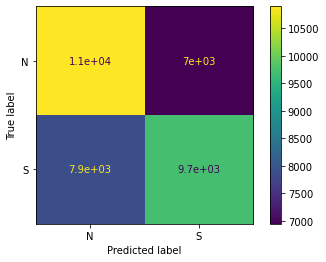

In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test2, prediction2)*100,2)))
print(metrics.classification_report(y_test2, prediction2))
plot_confusion_matrix(model2, X_test2, y_test2)  
plt.show()

Conclusion:

We have obtained a model that has a 58,16% accuracy score.

Save the model:

In [ ]:
dump(model2, '/content/gdrive/MyDrive/Personality prediction/Balanced Models/model2.joblib')

['/content/gdrive/MyDrive/Personality prediction/Balanced Models/model2.joblib']

### Model for the 3rd pair

Our dataset is unbalanced, so we're going to undersample the majority class.

In [ ]:
class_count_F, class_count_T = df['Letter3'].value_counts()
class_F = df[df['Letter3'] == 'F']
class_T = df[df['Letter3'] == 'T']
print('F:', class_F.shape)
print('T:', class_T.shape)

F: (213290, 5)
T: (180689, 5)


total class of T and F: T    180689
F    180689
Name: Letter3, dtype: int64


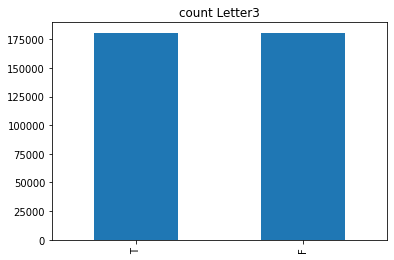

In [ ]:
class_F_under = class_F.sample(class_count_T)
test_under3 = pd.concat([class_F_under, class_T], axis=0)
print("total class of T and F:", test_under3['Letter3'].value_counts())
test_under3['Letter3'].value_counts().plot(kind='bar', title='count Letter3')

Create the necessary dataframe and shuffle it:

In [ ]:
df3 = test_under3[['posts', 'Letter3']]
df3 = df3.sample(frac = 1)
df3

,posts,Letter3
239042,lelouch lamperoug kind thought like alway igno...,F
270757,king men robert penn warren,T
282687,alway hesit proclaim thing broad moral oblig m...,T
304054,wonder soul ye would love healer heal someon h...,F
400151,depend success unless clinic depress bipolar f...,F
...,...,...
205628,1 need babi,F
244499,intj women scari news,F
84493,nighti thank consid respons back sorri take lo...,F
166347,crash nt parti infp would alway enjoy video ga...,F


Split the dataset into the train and test:

In [ ]:
X3 = df3['posts']
y3 = df3['Letter3']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

Create the model:

In [ ]:
pipe3 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 2))])
model3 = pipe3.fit(X_train3, y_train3)
prediction3 = model3.predict(X_test3)

Evaluate the model:

accuracy: 60.59%
              precision    recall  f1-score   support

           F       0.60      0.63      0.62     59692
           T       0.61      0.58      0.60     59563

    accuracy                           0.61    119255
   macro avg       0.61      0.61      0.61    119255
weighted avg       0.61      0.61      0.61    119255



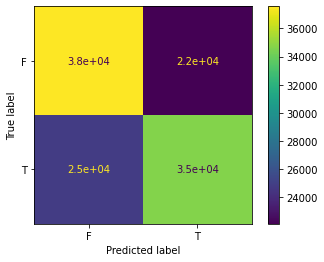

In [ ]:
print("accuracy: {}%".format(round(accuracy_score(y_test3, prediction3)*100,2)))
print(metrics.classification_report(y_test3, prediction3))
plot_confusion_matrix(model3, X_test3, y_test3)  
plt.show()

Conclusion:

We have obtained a model that has a 60,59% accuracy score.

Save the model:

In [ ]:
dump(model3, '/content/gdrive/MyDrive/Personality prediction/Balanced Models/model3.joblib')

['/content/gdrive/MyDrive/Personality prediction/Balanced Models/model3.joblib']

### Model for the 4th pair




Our dataset is unbalanced, so we're going to undersample the majority class.

In [114]:
class_count_P, class_count_J = df['Letter4'].value_counts()
class_P = df[df['Letter4'] == 'P']
class_J = df[df['Letter4'] == 'J']
print('P:', class_P.shape)
print('J:', class_J.shape)

P: (237798, 5)
J: (156181, 5)


total class of J and P: P    156181
J    156181
Name: Letter4, dtype: int64


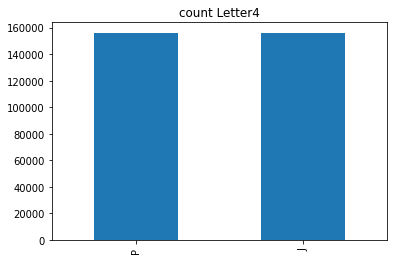

In [115]:
class_P_under = class_P.sample(class_count_J)
test_under4 = pd.concat([class_P_under, class_J], axis=0)
print("total class of J and P:", test_under4['Letter4'].value_counts())
test_under4['Letter4'].value_counts().plot(kind='bar', title='count Letter4')

Create the necessary dataframe and shuffle it:

In [116]:
df4 = test_under4[['posts', 'Letter4']]
df4 = df4.sample(frac = 1)
df4

,posts,Letter4
407504,math math got along great math got involv alph...,P
413931,p chill pill aisl 5 strategi fals confid never...,P
217634,old could take colleg class particip commun ma...,P
94787,hah thank grape smoke realm drink im lil bitch,P
203771,dad intj brother intj friend know intj idk kno...,J
...,...,...
74138,happen often initi feel like absolut random ro...,P
193795,iron reuben abel discuss introduct book man me...,P
115177,thank ah quick say troubl effici look like dif...,P
227274,curiou person assign skip like post count quit...,P


Split the dataset into the train and test:

In [117]:
X4 = df4['posts']
y4 = df4['Letter4']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=42)

Create the model:

In [118]:
pipe4 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 2))])
model4 = pipe4.fit(X_train4, y_train4)
prediction4 = model4.predict(X_test4)

Evaluate the model:

accuracy: 56.1%
              precision    recall  f1-score   support

           J       0.56      0.58      0.57     51478
           P       0.56      0.54      0.55     51602

    accuracy                           0.56    103080
   macro avg       0.56      0.56      0.56    103080
weighted avg       0.56      0.56      0.56    103080



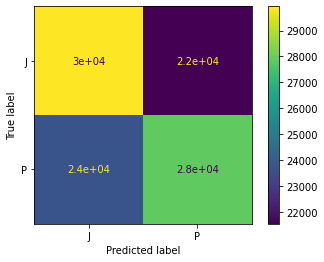

In [119]:
print("accuracy: {}%".format(round(accuracy_score(y_test4, prediction4)*100,2)))
print(metrics.classification_report(y_test4, prediction4))
plot_confusion_matrix(model4, X_test4, y_test4)  
plt.show()

Conclusion:

We have obtained a model that has a 56,1% accuracy score.

Save the model:

In [120]:
dump(model4, '/content/gdrive/MyDrive/Personality prediction/Balanced Models/model4.joblib')

['/content/gdrive/MyDrive/Personality prediction/Balanced Models/model4.joblib']